<a href="https://colab.research.google.com/github/DiaaEddinH/ML-python-project/blob/main/fcc_sms_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you need to create a machine learning model that will classify SMS messages as either "ham" or "spam". A "ham" message is a normal message sent by a friend. A "spam" message is an advertisement or a message sent by a company.

You should create a function called `predict_message` that takes a message string as an argument and returns a list. The first element in the list should be a number between zero and one that indicates the likeliness of "ham" (0) or "spam" (1). The second element in the list should be the word "ham" or "spam", depending on which is most likely.

For this challenge, you will use the [SMS Spam Collection dataset](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/). The dataset has already been grouped into train data and test data.

The first two cells import the libraries and data. The final cell tests your model and function. Add your code in between these cells.


In [ ]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

In [ ]:
train_dataset = pd.read_csv(
      train_file_path,
      header = None,
      names=["sms_type","sms_text"],
      usecols=["sms_type","sms_text"],
      dtype={"sms_type":"str","sms_text":"str"},
      sep="\t")

test_dataset = pd.read_csv(
      test_file_path,
      header = None,
      names=["sms_type","sms_text"],
      usecols=["sms_type","sms_text"],
      dtype={"sms_type":"str","sms_text":"str"},
      sep="\t")

train_labels = train_dataset.copy().pop('sms_type').map(lambda k: 0 if k=="ham" else 1)
test_labels = test_dataset.copy().pop('sms_type').map(lambda k: 0 if k=="ham" else 1)

In [ ]:
vocab_size = 10000
maxlen = 300

#word-level one hot-encoding using Tokenizer
tokenizer = keras.preprocessing.text.Tokenizer(vocab_size)
tokenizer.fit_on_texts(train_dataset.sms_text)
sequences = tokenizer.texts_to_sequences(train_dataset.sms_text)
one_hot_res = tokenizer.texts_to_matrix(train_dataset.sms_text,mode='binary')
word_index = tokenizer.word_index

In [ ]:
x_train = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)
y_train = np.asarray(train_labels)
#train_dataset.sms_type = train_dataset.sms_type.map(lambda k: 0 if k=="ham" else 1)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(vocab_size,32))
model.add(keras.layers.LSTM(32))
#model.add(keras.layers.Flatten())
#model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(x_train,y_train, batch_size=32,
                    epochs=20, validation_split = 0.2)

Epoch 1/20
105/105 [==============================] - 12s 105ms/step - loss: 0.4765 - acc: 0.8423 - val_loss: 0.1148 - val_acc: 0.9737
Epoch 2/20
105/105 [==============================] - 11s 101ms/step - loss: 0.0945 - acc: 0.9823 - val_loss: 0.0536 - val_acc: 0.9868
Epoch 3/20
105/105 [==============================] - 10s 98ms/step - loss: 0.0319 - acc: 0.9947 - val_loss: 0.0642 - val_acc: 0.9809
Epoch 4/20
105/105 [==============================] - 10s 97ms/step - loss: 0.0099 - acc: 0.9990 - val_loss: 0.0416 - val_acc: 0.9904
Epoch 5/20
105/105 [==============================] - 11s 101ms/step - loss: 0.0063 - acc: 0.9991 - val_loss: 0.0590 - val_acc: 0.9856
Epoch 6/20
105/105 [==============================] - 10s 98ms/step - loss: 0.0072 - acc: 0.9996 - val_loss: 0.0470 - val_acc: 0.9904
Epoch 7/20
105/105 [==============================] - 11s 101ms/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.0536 - val_acc: 0.9856
Epoch 8/20
105/105 [==============================] - 11s 

In [ ]:
sequences = tokenizer.texts_to_sequences(test_dataset.sms_text)
x_test = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(test_labels)

In [ ]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 1s 18ms/step - loss: 0.0701 - acc: 0.9878


[0.07013226300477982, 0.9877873659133911]

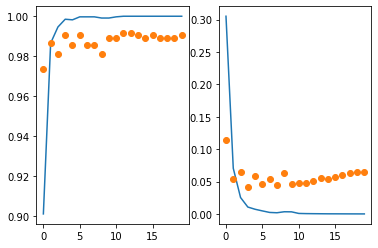

In [ ]:
dt = history.history
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(dt['acc'])
ax1.plot(dt['val_acc'],'o')

ax2.plot(dt['loss'])
ax2.plot(dt['val_loss'],'o')

In [ ]:
def encode_text(text):
  token = keras.preprocessing.text.text_to_word_sequence(text)
  token = [word_index[word] if word in word_index else 0 for word in token]
  return keras.preprocessing.sequence.pad_sequences([token],maxlen)[0]

reverse_word_index = {value: key for (key,value) in word_index.items()}

In [ ]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
  encoded = encode_text(pred_text)
  pred = np.zeros((1,maxlen))
  pred[0] = encoded
  prediction = list(model.predict(pred)[0])
  prediction.append("ham" if prediction[0] <0.5 else "spam")

  return prediction

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print(prediction)

[9.8756376e-05, 'ham']


In [ ]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


You passed the challenge. Great job!


In [ ]:
predict_message("sale today! to stop texts call 98912460324")

[0.9885661, 'spam']